In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import scipy.stats as stats

In [3]:
df = pd.read_csv('C:\\Users\\susna\\Downloads\\singapore.csv')

In [4]:
# Check the first few rows of the dataset
print(df.head())

# Get the shape of the dataset
print(df.shape)

# Check data types and missing values
print(df.info())

# Summary statistics
print(df.describe())

      id                                 name  host_id  host_name  \
0  49091    COZICOMFORT LONG TERM STAY ROOM 2   266763  Francesca   
1  50646      Pleasant Room along Bukit Timah   227796    Sujatha   
2  56334                          COZICOMFORT   266763  Francesca   
3  71609  Ensuite Room (Room 1 & 2) near EXPO   367042    Belinda   
4  71896      B&B  Room 1 near Airport & EXPO   367042    Belinda   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0        North Region     Woodlands   1.44255  103.79580  Private room     83   
1      Central Region   Bukit Timah   1.33235  103.78521  Private room     81   
2        North Region     Woodlands   1.44246  103.79667  Private room     69   
3         East Region      Tampines   1.34541  103.95712  Private room    206   
4         East Region      Tampines   1.34567  103.95963  Private room     94   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0             180          

In [26]:
# Handle missing values
df.dropna(inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)


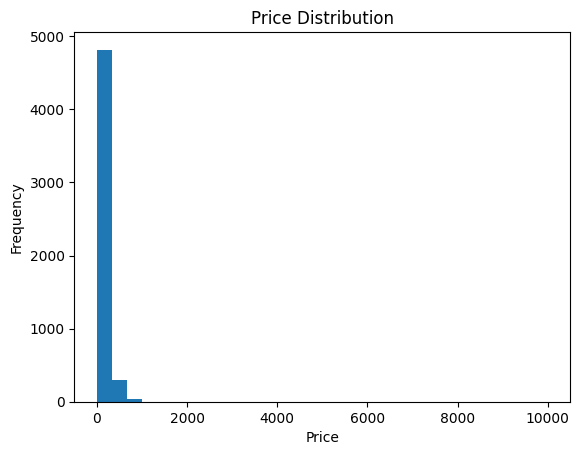

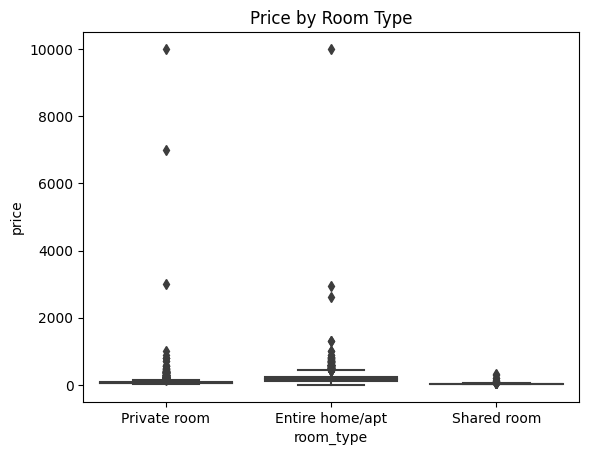

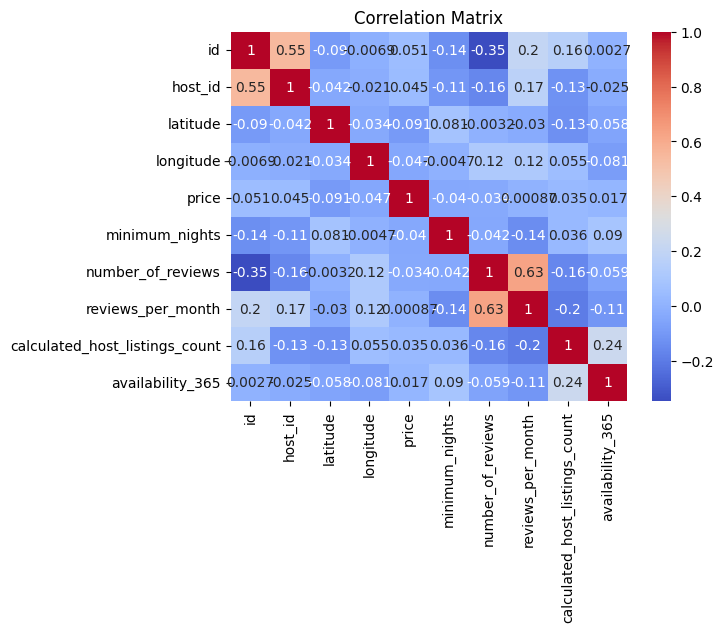

In [28]:
# Histogram of a numerical variable
plt.hist(df['price'], bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

# Box plot to identify outliers
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price by Room Type')
plt.show()

# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Check if there are any missing values in the numeric columns
if numeric_df.isnull().values.any():
# Handle missing values as needed (e.g., imputation)
   numeric_df.fillna(0, inplace=True)  # Replace missing values with zeros

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Create a heatmap to visualize the correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [29]:
# Extracting year and month from the 'last_review' column
df['last_review'] = pd.to_datetime(df['last_review'])
df['year'] = df['last_review'].dt.year
df['month'] = df['last_review'].dt.month


In [30]:
# Average price by neighborhood
neighborhood_price = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
print(neighborhood_price)

# Occupancy rate by month
monthly_occupancy = df.groupby('month')['availability_365'].mean()
print(monthly_occupancy)


neighbourhood
Tuas                       10000.000000
Southern Islands            1039.571429
Bukit Panjang                526.863636
Marina South                 419.000000
Orchard                      263.117647
Museum                       219.269231
Downtown Core                218.903571
Newton                       187.602151
Tanglin                      186.067164
Clementi                     183.642857
Novena                       174.530351
Singapore River              160.836364
Rochor                       155.842541
Marine Parade                151.000000
River Valley                 150.406844
Outram                       144.881159
Bukit Merah                  143.977444
Geylang                      142.703704
Kallang                      141.802009
Bedok                        124.135659
Queenstown                   123.423841
Central Water Catchment      110.363636
Bukit Timah                  106.288889
Jurong East                  105.633803
Toa Payoh                 

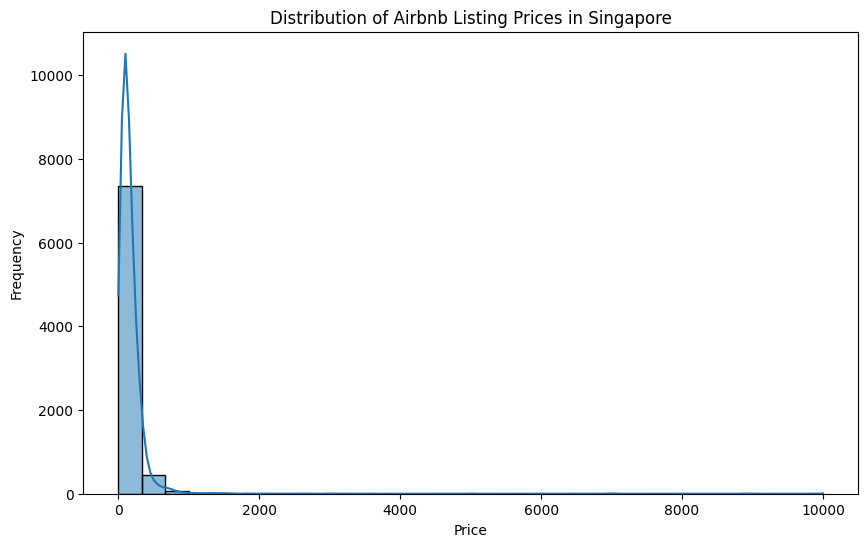

In [5]:
#1. Distribution of Airbnb Listing Prices:

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Airbnb Listing Prices in Singapore')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


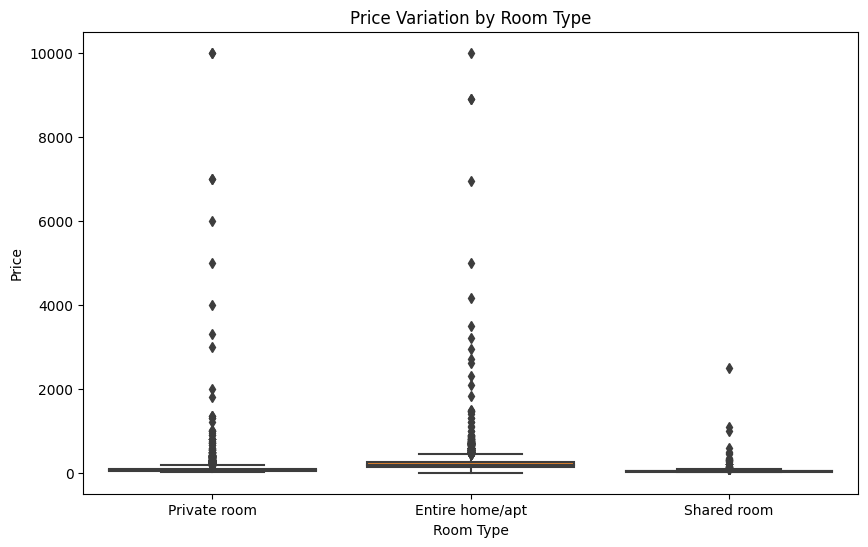

In [6]:
#2. Price Variation by Room Type:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price Variation by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()


In [7]:
# 3. Average Price per Neighborhood:

average_price_by_neighborhood = df.groupby('neighbourhood')['price'].mean()
print(average_price_by_neighborhood)


neighbourhood
Ang Mo Kio                   103.448276
Bedok                        158.630027
Bishan                       170.508772
Bukit Batok                  206.169231
Bukit Merah                  151.442553
Bukit Panjang                365.352941
Bukit Timah                  153.969466
Central Water Catchment      184.852941
Choa Chu Kang                 93.317460
Clementi                     170.705882
Downtown Core                205.394860
Geylang                      161.598592
Hougang                      124.321101
Jurong East                  184.720339
Jurong West                   91.045752
Kallang                      166.162991
Lim Chu Kang                  65.000000
Mandai                        56.666667
Marina South                 419.000000
Marine Parade                145.818713
Museum                       236.317460
Newton                       188.746269
Novena                       177.441341
Orchard                      291.029412
Outram                    

In [8]:
# 4. Correlation between number_of_reviews and Price:

correlation_bedrooms_price = df['number_of_reviews'].corr(df['price'])
print(f"Correlation between number_of_reviews and Price: {correlation_bedrooms_price}")

Correlation between number_of_reviews and Price: -0.0420129997304842


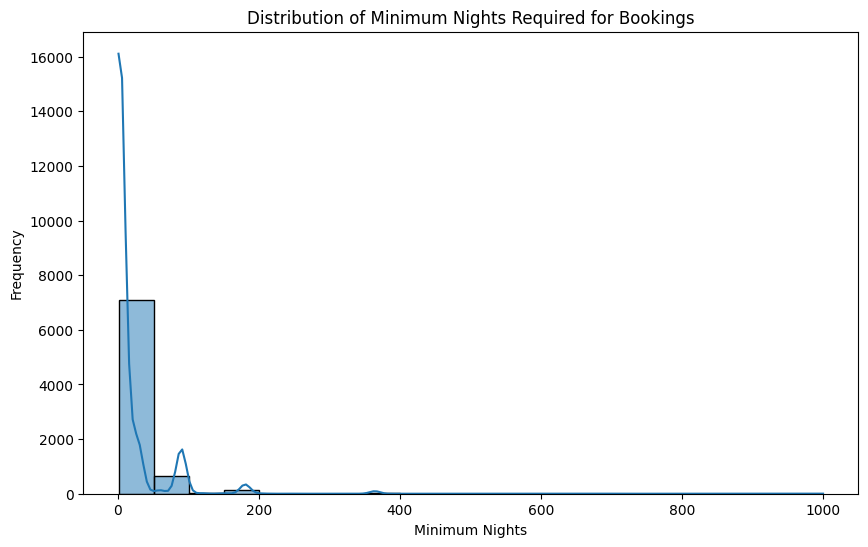

In [9]:
# 5. Distribution of Minimum Nights Required:

plt.figure(figsize=(10, 6))
sns.histplot(df['minimum_nights'], bins=20, kde=True)
plt.title('Distribution of Minimum Nights Required for Bookings')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.show()


In [10]:
# 6. Availability Change Over the Year:

df['year'] = pd.to_datetime(df['minimum_nights']).dt.year
availability_by_year = df.groupby('year')['availability_365'].mean()
print(availability_by_year)


year
1970    208.726318
Name: availability_365, dtype: float64


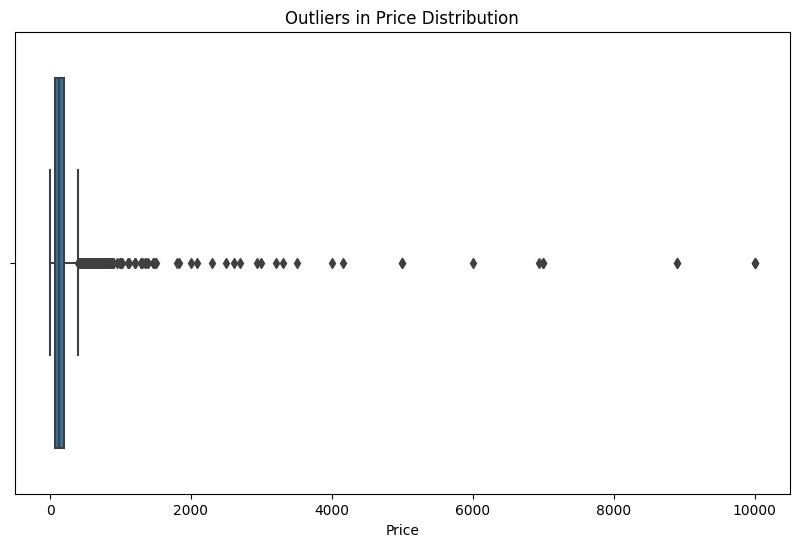

In [11]:
# 7. Outliers in Price Distribution:

plt.figure(figsize=(10, 6))
sns.boxplot(x='price', data=df)
plt.title('Outliers in Price Distribution')
plt.xlabel('Price')
plt.show()


In [12]:
# 8. Average Rating Score:

average_rating_score = df['number_of_reviews'].mean()
print(f"Average Rating Score for Airbnb Listings in Singapore: {average_rating_score}")


Average Rating Score for Airbnb Listings in Singapore: 12.807385860629822


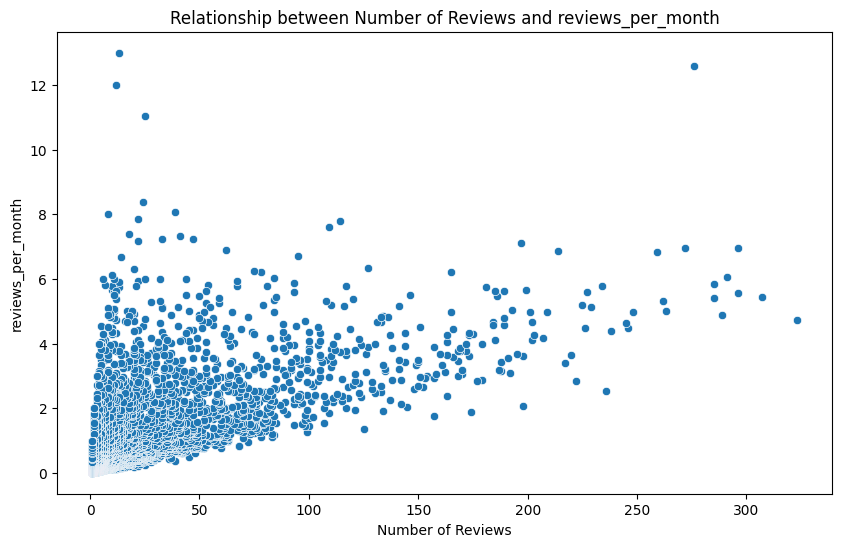

In [13]:
# 9. Relationship between Number of Reviews and reviews_per_month:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='reviews_per_month', data=df)
plt.title('Relationship between Number of Reviews and reviews_per_month')
plt.xlabel('Number of Reviews')
plt.ylabel('reviews_per_month')
plt.show()


In [14]:
# 10. Number of Listings per Host:

listings_per_host = df['host_id'].value_counts()
print(listings_per_host)


host_id
66406177     274
8492007      203
209913841    157
29420853     141
31464513     114
            ... 
10884468       1
56790426       1
1183530        1
24351539       1
286260560      1
Name: count, Length: 2705, dtype: int64


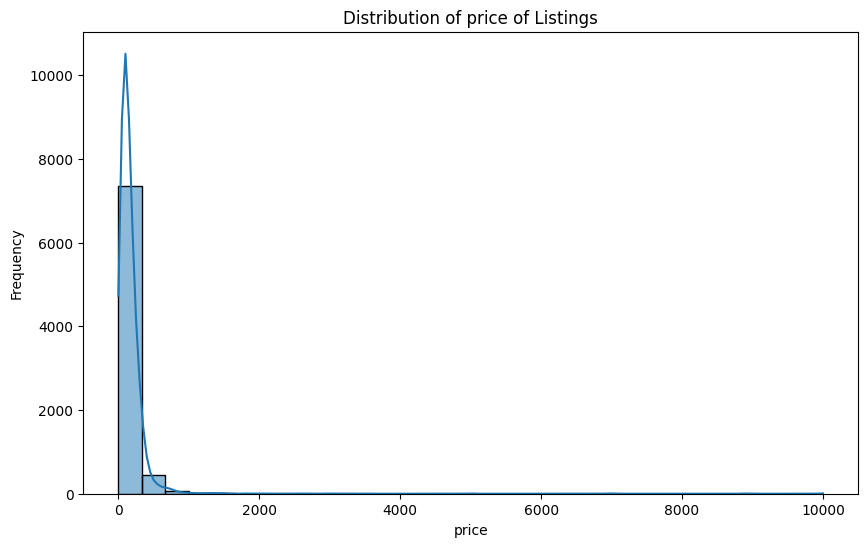

In [15]:
# 11. Distribution of price of Listings:

plt.figure(figsize=(10, 6))
sns.histplot(df['price'].dropna(), bins=30, kde=True)
plt.title('Distribution of price of Listings')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()


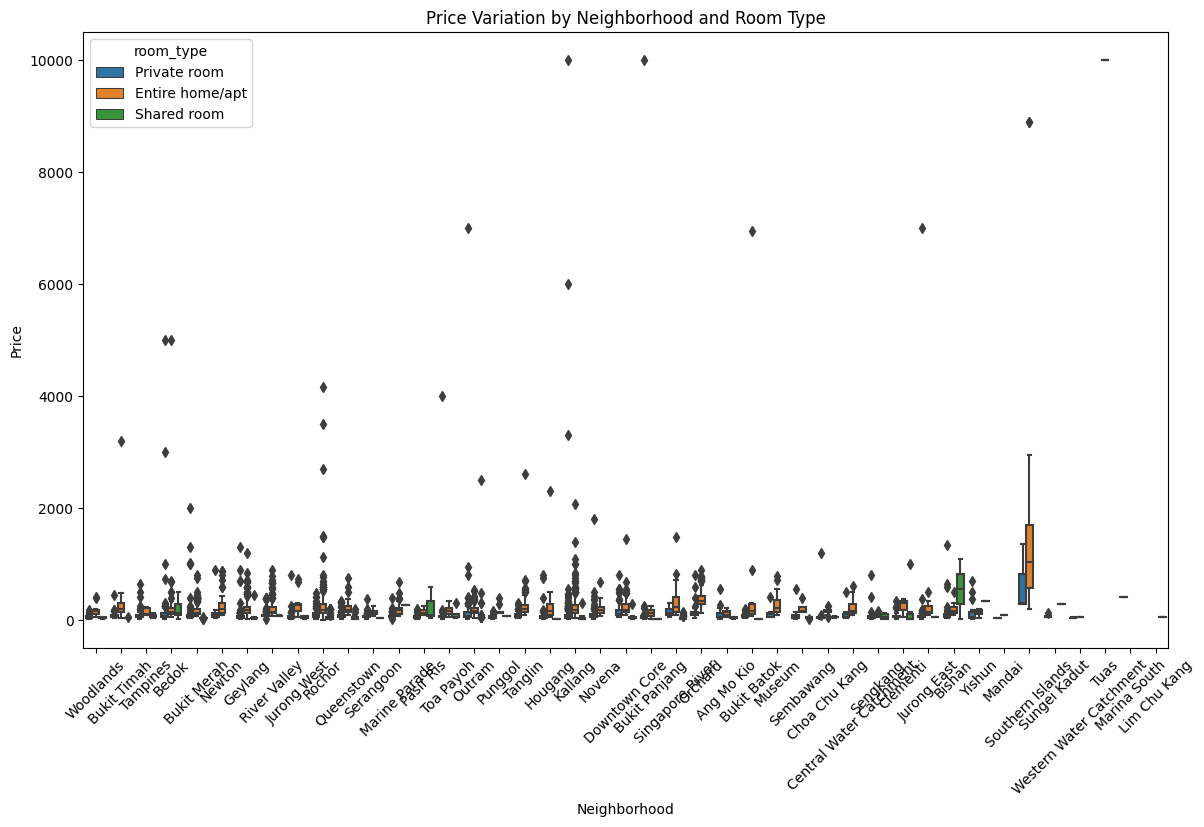

In [16]:
# 12. Price Variation by Neighborhood and Room Type:

plt.figure(figsize=(14, 8))
sns.boxplot(x='neighbourhood', y='price', hue='room_type', data=df)
plt.title('Price Variation by Neighborhood and Room Type')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


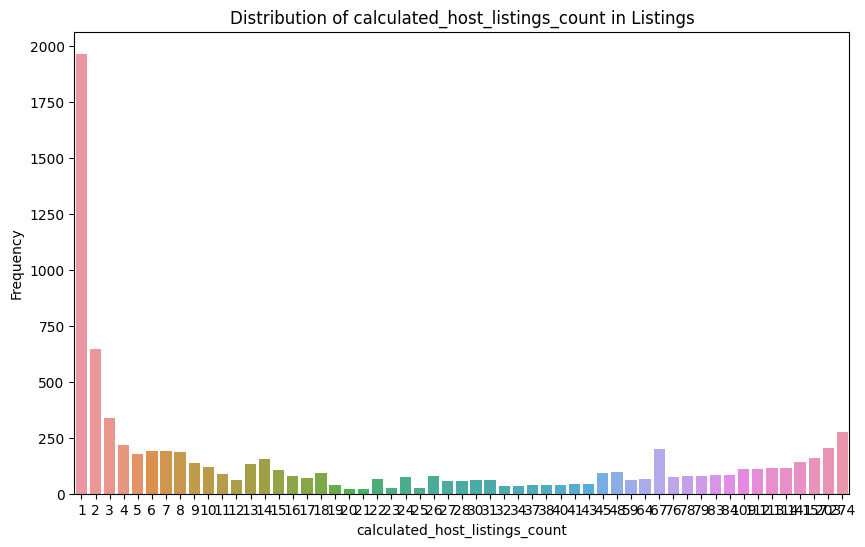

In [17]:
# 13. Distribution of calculated_host_listings_count:

plt.figure(figsize=(10, 6))
sns.countplot(x='calculated_host_listings_count', data=df)
plt.title('Distribution of calculated_host_listings_count in Listings')
plt.xlabel('calculated_host_listings_count')
plt.ylabel('Frequency')
plt.show()


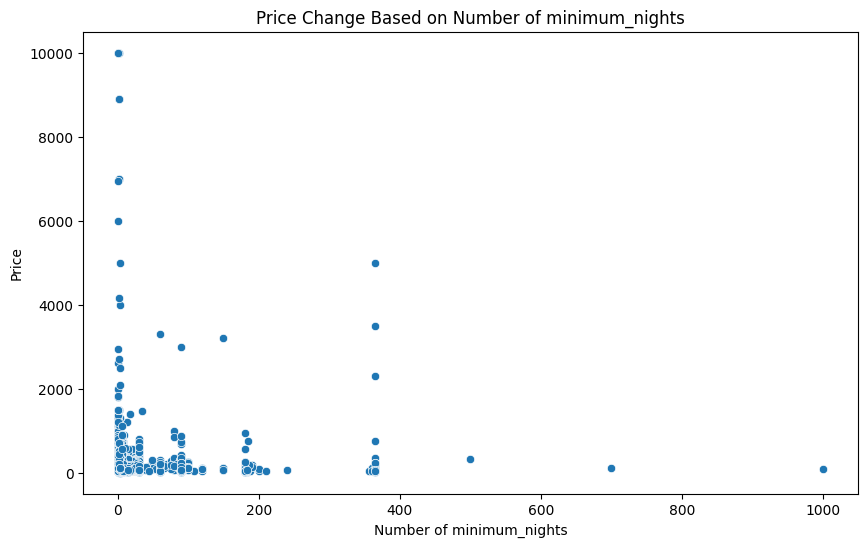

In [18]:
# 14. Price Change Based on Number of minimum_nights:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='minimum_nights', y='price', data=df)
plt.title('Price Change Based on Number of minimum_nights')
plt.xlabel('Number of minimum_nights')
plt.ylabel('Price')
plt.show()


In [19]:
# 15. Average Price per Neighborhood for High-Rated Listings:

high_rated_listings = df[df['reviews_per_month'] >= 4.5]
average_price_high_rated_neighborhood = high_rated_listings.groupby('neighbourhood')['price'].mean()
print(average_price_high_rated_neighborhood)


neighbourhood
Bedok                69.571429
Bukit Merah          74.000000
Clementi             79.000000
Downtown Core       255.736842
Geylang             222.583333
Hougang              56.000000
Kallang             147.785714
Marine Parade        71.750000
Museum              342.714286
Newton              139.500000
Novena              214.250000
Orchard             306.000000
Outram              190.666667
Pasir Ris            75.250000
Punggol              49.000000
River Valley        224.333333
Rochor              134.842105
Sengkang             50.500000
Serangoon            62.000000
Singapore River     200.000000
Southern Islands    200.000000
Tampines             69.400000
Tanglin             101.500000
Toa Payoh            46.000000
Woodlands            59.000000
Yishun               40.000000
Name: price, dtype: float64


In [20]:
# 16. Minimum Nights Requirement Variation by Neighborhood:

minimum_nights_by_neighborhood = df.groupby('neighbourhood')['minimum_nights'].mean()
print(minimum_nights_by_neighborhood)


neighbourhood
Ang Mo Kio                 23.241379
Bedok                      19.573727
Bishan                     36.421053
Bukit Batok                31.830769
Bukit Merah                15.523404
Bukit Panjang              17.088235
Bukit Timah                23.526718
Central Water Catchment    14.617647
Choa Chu Kang              24.523810
Clementi                   18.950980
Downtown Core              27.401869
Geylang                     9.082495
Hougang                    33.908257
Jurong East                18.550847
Jurong West                20.032680
Kallang                    13.248322
Lim Chu Kang                2.000000
Mandai                     70.000000
Marina South                1.000000
Marine Parade               9.795322
Museum                     14.222222
Newton                     14.955224
Novena                     15.748603
Orchard                     7.610294
Outram                     25.530398
Pasir Ris                  58.661972
Punggol                 

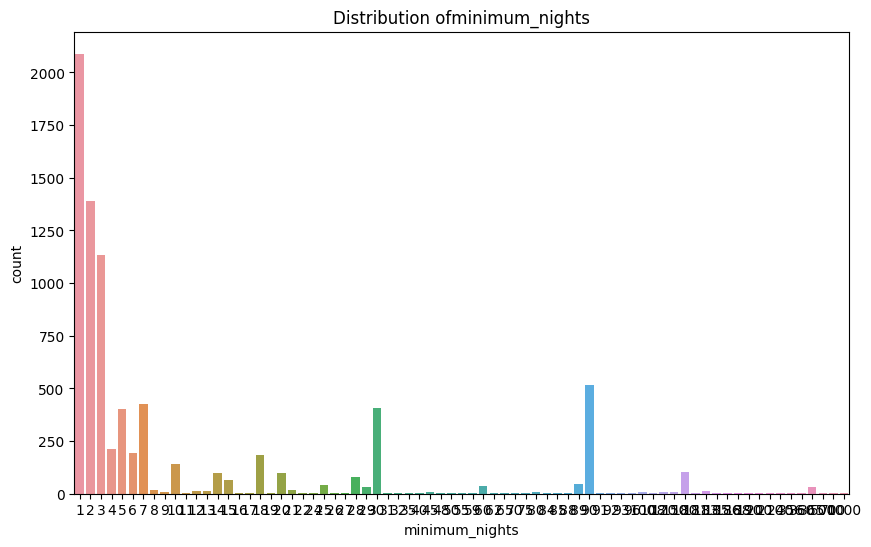

In [21]:
# 17. Distribution of Host Response Time:

plt.figure(figsize=(10, 6))
sns.countplot(x='minimum_nights', data=df)
plt.title('Distribution ofminimum_nights')
plt.xlabel('minimum_nights')
plt.show()


In [22]:
# 18. Correlation between Price and Number of Reviews:

correlation_price_reviews = df['price'].corr(df['number_of_reviews'])
print(f"Correlation between Price and Number of Reviews: {correlation_price_reviews}")


Correlation between Price and Number of Reviews: -0.0420129997304842


In [23]:
# 19. Price Change Over the Year for High-Rated Listings:

high_rated_listings = df[df['number_of_reviews'] >= 4.5]
high_rated_listings['year'] = pd.to_datetime(df['minimum_nights']).dt.year
average_price_by_year_high_rated = high_rated_listings.groupby('year')['price'].mean()
print(average_price_by_year_high_rated)


year
1970    149.640042
Name: price, dtype: float64


C:\Users\susna\AppData\Local\Temp\ipykernel_18184\904681716.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_rated_listings['year'] = pd.to_datetime(df['minimum_nights']).dt.year


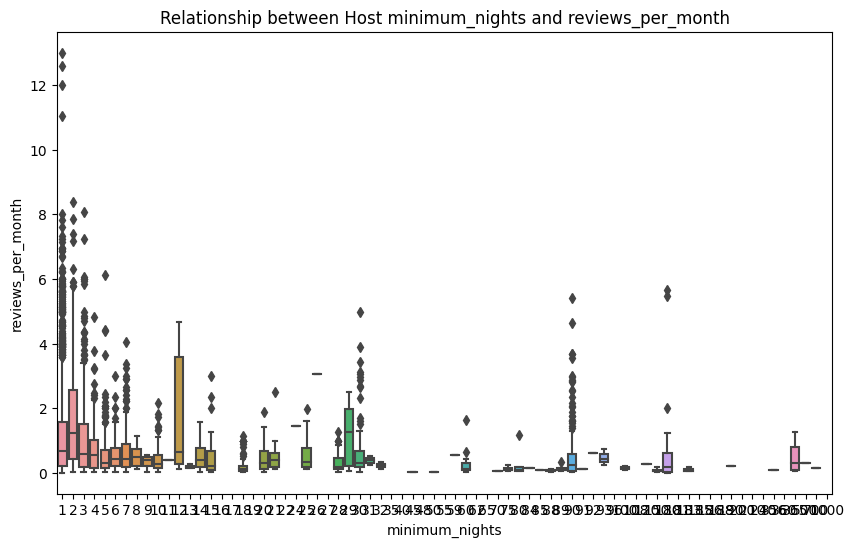

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='minimum_nights', y='reviews_per_month', data=df)
plt.title('Relationship between Host minimum_nights and reviews_per_month')
plt.show()

In [25]:
import statsmodels.api as sm
import pandas as pd

# Assuming df is your Singapore Airbnb dataset DataFrame

# Select relevant columns for the analysis
selected_columns = ['price', 'latitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']

# Create a new DataFrame with only the selected columns
selected_data = df[selected_columns]

# Drop rows with missing values
selected_data = selected_data.dropna()

# Define the independent variables (X) and the dependent variable (y)
X = selected_data[[ 'latitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']]
y = selected_data['price']

# Add a constant term to the independent variables matrix
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     14.20
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           1.58e-11
Time:                        01:31:22   Log-Likelihood:                -35785.
No. Observations:                5149   AIC:                         7.158e+04
Df Residuals:                    5144   BIC:                         7.161e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1152.6863    158.36